El objetivo de nuestro proyecto es clasificar la canción en uno de los 5 intervalos de popularidad

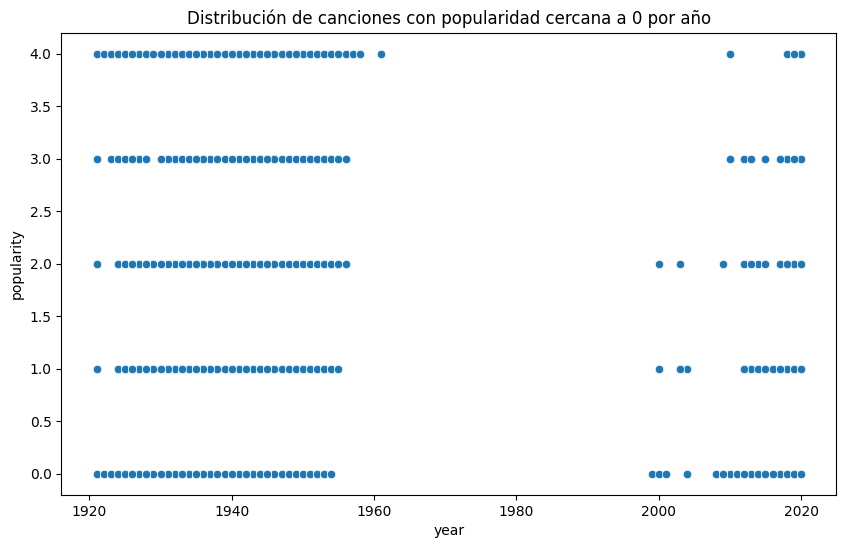

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('archive/data.csv')

# Mostramos la distribución de canciones con popularidad cercana a 0 por año
plt.figure(figsize=(10,6))
sns.scatterplot(data=df[df['popularity'] < 5], x='year', y='popularity')
plt.title("Distribución de canciones con popularidad cercana a 0 por año")
plt.show()

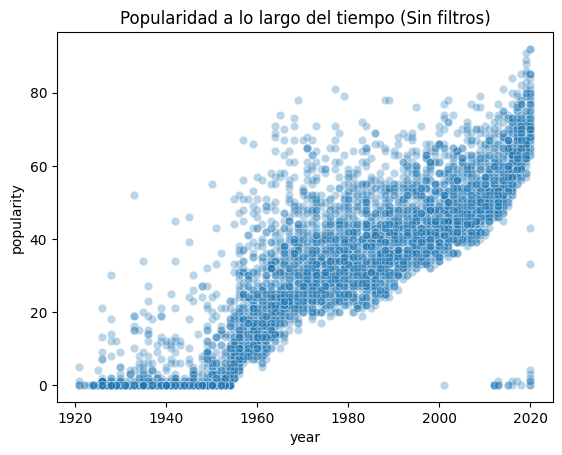

In [18]:
# Gráfico de TODOS los datos (una muestra aleatoria para no saturar)
sns.scatterplot(data=df.sample(5000), x='year', y='popularity', alpha=0.3)
plt.title("Popularidad a lo largo del tiempo (Sin filtros)")
plt.show()

In [23]:
# Crear el nuevo dataframe limpio
# Usamos .copy() para evitar advertencias de pandas más adelante
df_final = df[df['year'] >= 1960].copy()

# Verificar cuántos datos os quedan
print(f"Dimensiones originales: {df.shape}")
print(f"Dimensiones tras limpieza: {df_final.shape}")

# Un vistazo rápido para asegurar que no hay años viejos
print(f"Año mínimo: {df_final['year'].min()}")

Dimensiones originales: (170653, 19)
Dimensiones tras limpieza: (120750, 19)
Año mínimo: 1960


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumimos que df_final es vuestro dataset completo cargado

# 1. ANÁLISIS DE "BASURA"
# Vamos a ver qué pinta tienen esas muestras sospechosas
muestras_cortas = df_final[df_final['duration_ms'] < 60000] # Menos de 1 min
muestras_habladas = df_final[df_final['speechiness'] > 0.9] # Casi todo voz
muestras_sin_tempo = df_final[df_final['tempo'] == 0]       # Error técnico

print(f"Canciones de menos de 1 minuto: {len(muestras_cortas)}")
print(f"Tracks que son solo voz (audiolibros/charlas): {len(muestras_habladas)}")
print(f"Tracks con tempo 0: {len(muestras_sin_tempo)}")

# 2. APLICACIÓN DE LA LIMPIEZA
# Definimos las condiciones de "Basura"
condicion_basura = (
    (df_final['duration_ms'] < 40000) |       # Menos de 40 seg (Intros/Ruido)
    (df_final['speechiness'] > 0.9) |         # Pura voz (No música)
    (df_final['tempo'] == 0)                  # Error de datos
)

# Nos quedamos con lo que NO es basura
# El símbolo ~ invierte la condición (significa "NO es basura")
df_limpio_final = df_final[~condicion_basura].copy()

print(f"\nDimensiones antes de limpiar basura: {df_final.shape}")
print(f"Dimensiones después de limpiar basura: {df_limpio_final.shape}")
print(f"Hemos eliminado {df_final.shape[0] - df_limpio_final.shape[0]} muestras de 'ruido'.")

# 3. VERIFICACIÓN
# Comprobamos que seguimos teniendo los ceros "buenos" (los antiguos)
ceros_antiguos = df_limpio_final[(df_limpio_final['year'] < 1950) & (df_limpio_final['popularity'] == 0)]
print(f"\nTodavía conservamos {len(ceros_antiguos)} canciones antiguas con popularidad 0.")

Canciones de menos de 1 minuto: 481
Tracks que son solo voz (audiolibros/charlas): 227
Tracks con tempo 0: 93

Dimensiones antes de limpiar basura: (120750, 22)
Dimensiones después de limpiar basura: (120328, 22)
Hemos eliminado 422 muestras de 'ruido'.

Todavía conservamos 0 canciones antiguas con popularidad 0.


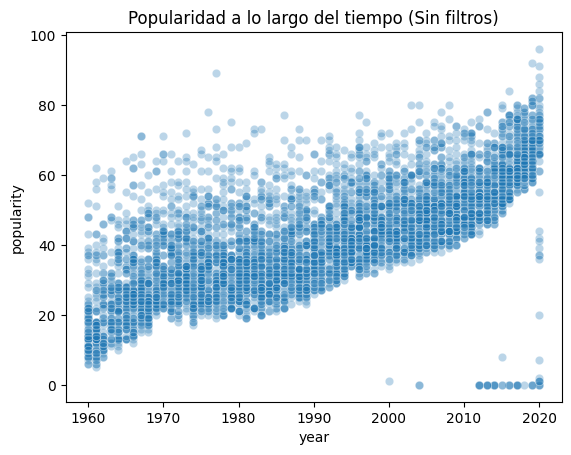

In [24]:
# Gráfico de TODOS los datos (una muestra aleatoria para no saturar)
sns.scatterplot(data=df_final.sample(5000), x='year', y='popularity', alpha=0.3)
plt.title("Popularidad a lo largo del tiempo (Sin filtros)")
plt.show()

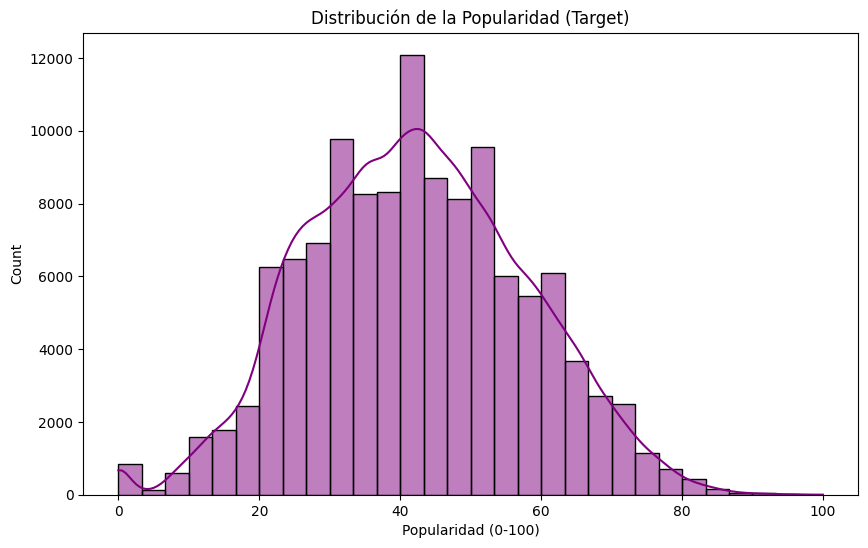

count    120750.000000
mean         42.169201
std          15.516553
min           0.000000
25%          31.000000
50%          42.000000
75%          53.000000
max         100.000000
Name: popularity, dtype: float64


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_final['popularity'], kde=True, bins=30, color='purple')
plt.title('Distribución de la Popularidad (Target)')
plt.xlabel('Popularidad (0-100)')
plt.show()

# Estadísticos básicos
print(df_final['popularity'].describe())

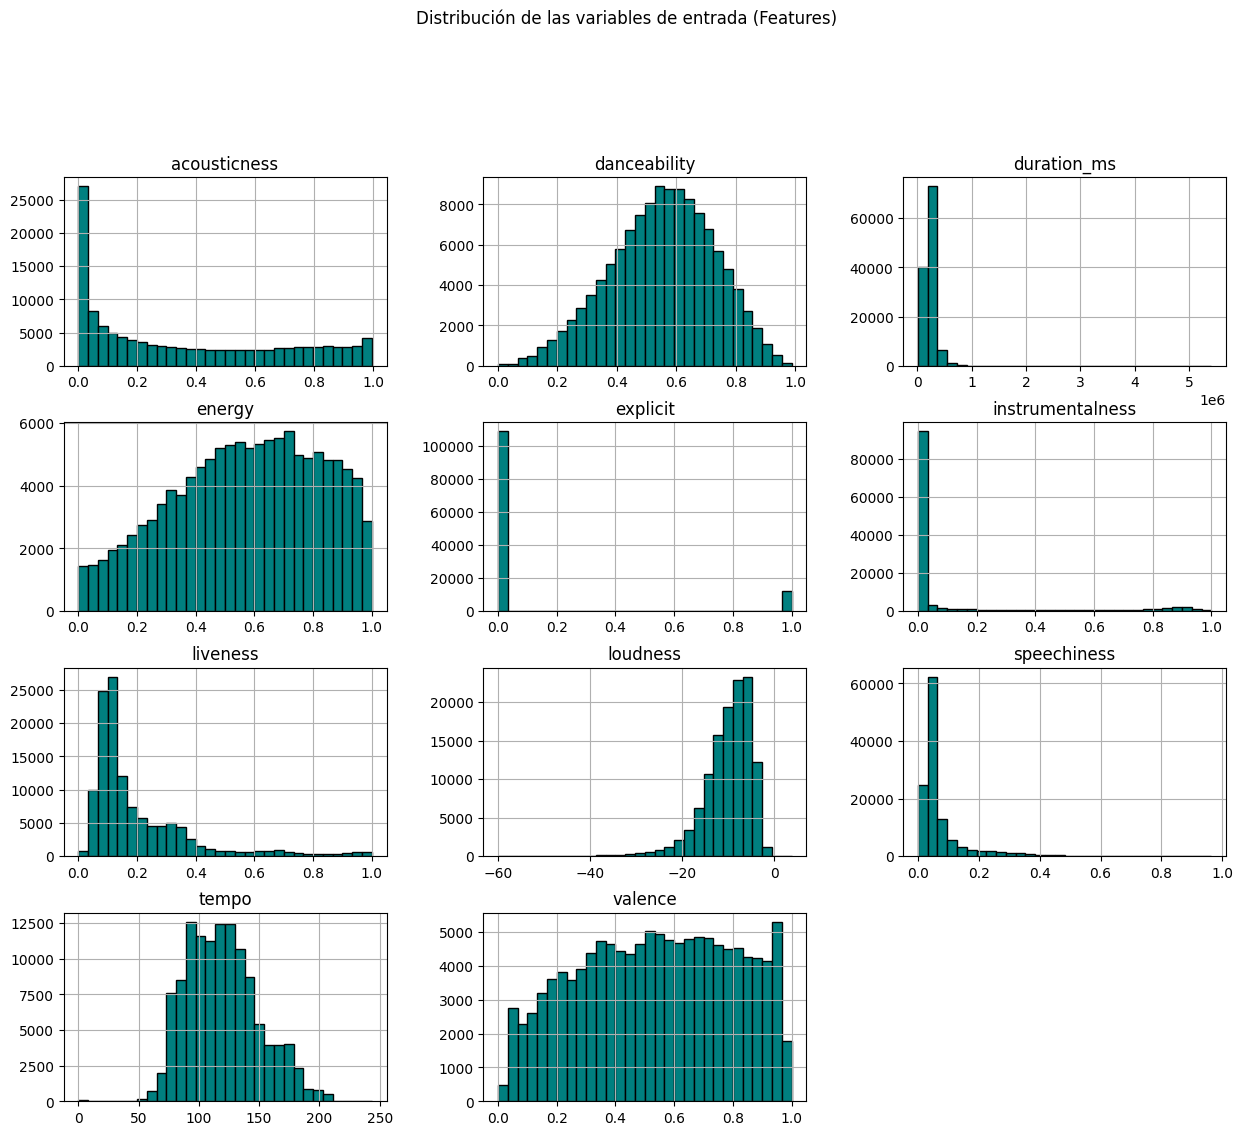

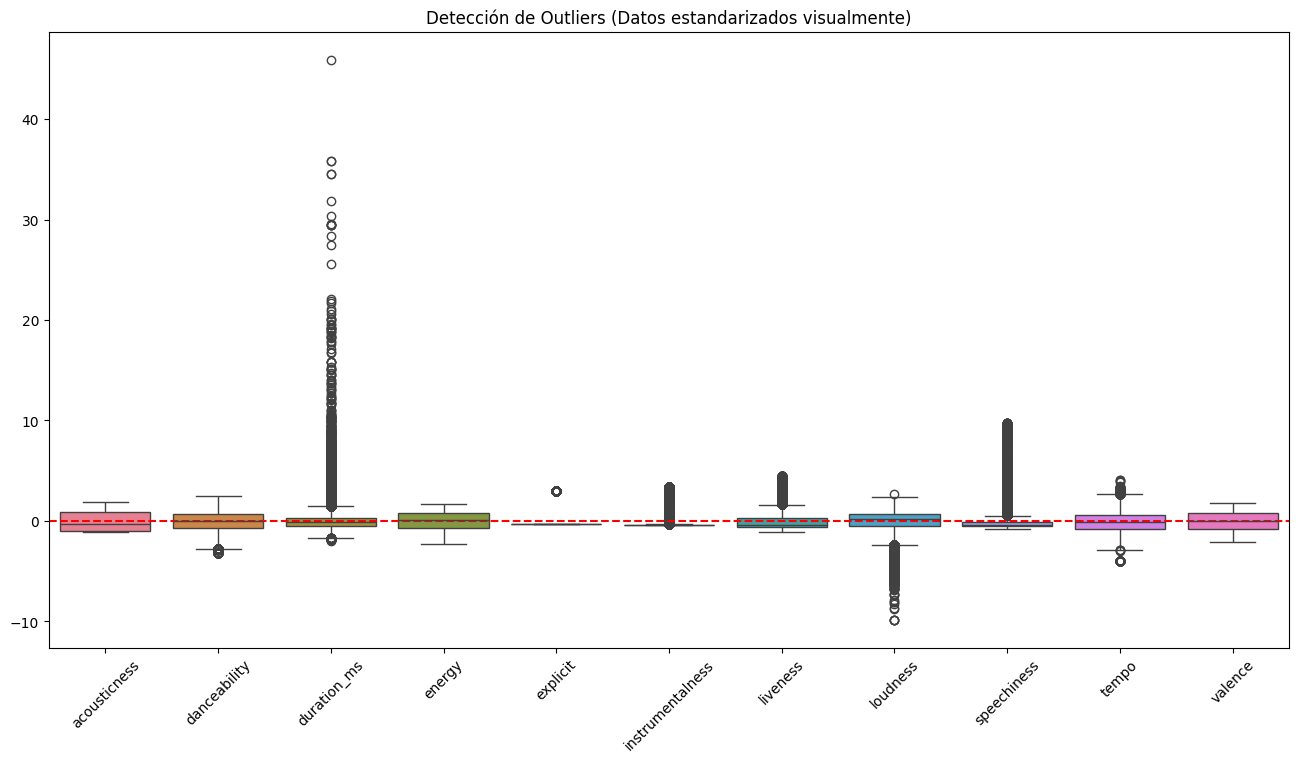

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos las columnas numéricas que usaremos para predecir
# Quitamos 'popularity' (es la Y) y 'year' (ya sabemos que está bien)
features = ['acousticness', 'danceability', 'duration_ms', 'energy',
            'explicit', 'instrumentalness', 'liveness', 'loudness',
            'speechiness', 'tempo', 'valence']

# 1. HISTOGRAMAS (¿Cómo se distribuyen los datos?)
df_final[features].hist(figsize=(15, 12), bins=30, color='teal', edgecolor='black')
plt.suptitle('Distribución de las variables de entrada (Features)', y=1.02)
plt.show()

# 2. BOXPLOTS (Para ver Outliers y Escalas)
plt.figure(figsize=(16, 8))
# Usamos escala logarítmica para duration_ms porque es GIGANTE comparado con el resto
# O mejor: Estandarizamos visualmente solo para el gráfico para poder compararlas
df_norm_visual = (df_final[features] - df_final[features].mean()) / df_final[features].std()

sns.boxplot(data=df_norm_visual)
plt.xticks(rotation=45)
plt.title('Detección de Outliers (Datos estandarizados visualmente)')
plt.axhline(y=0, color='r', linestyle='--') # Línea de la media
plt.show()

C:\Users\Adrián\AppData\Local\Temp\ipykernel_11436\3030113368.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x='class_fixed', ax=axes[0], palette='viridis')
C:\Users\Adrián\AppData\Local\Temp\ipykernel_11436\3030113368.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x='class_balanced', ax=axes[1], palette='viridis')


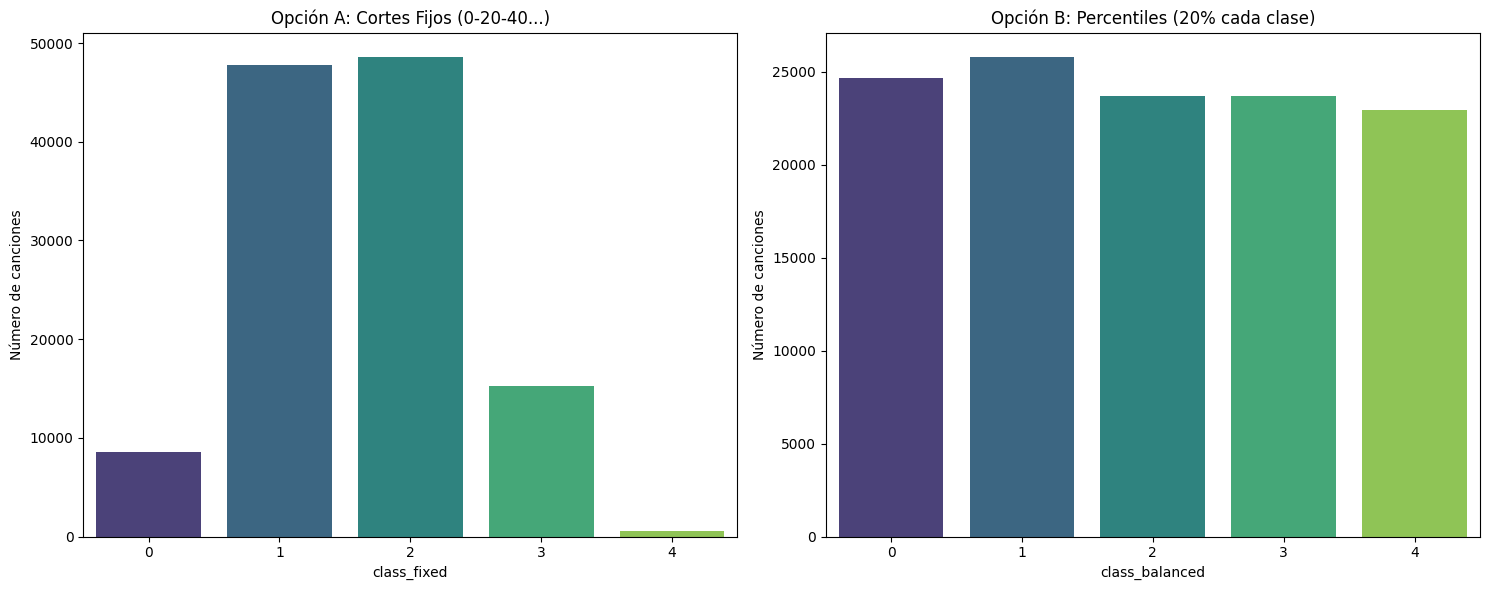

--- CORTES CALCULADOS PARA LA OPCIÓN B (EQUILIBRADA) ---
Los intervalos reales para que quede equilibrado son: [  0.  28.  38.  46.  56. 100.]


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# OPCIÓN A: Cortes fijos (Matemáticos)
# 0-20, 21-40, 41-60, 61-80, 81-100
bins_fixed = [-1, 20, 40, 60, 80, 100]
labels_5 = [0, 1, 2, 3, 4] # 0: Muy Baja, 1: Baja, 2: Media, 3: Alta, 4: Hit
df_final['class_fixed'] = pd.cut(df_final['popularity'], bins=bins_fixed, labels=labels_5)

# OPCIÓN B: Cortes por Percentiles (Equilibrados - Lo que tú pides)
# Divide los datos en 5 partes iguales (cada una con el 20% de las canciones)
df_final['class_balanced'], bins_q = pd.qcut(df_final['popularity'], q=5, labels=labels_5, retbins=True)

# --- VISUALIZACIÓN ---
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico Opción A
sns.countplot(data=df_final, x='class_fixed', ax=axes[0], palette='viridis')
axes[0].set_title('Opción A: Cortes Fijos (0-20-40...)')
axes[0].set_ylabel('Número de canciones')

# Gráfico Opción B
sns.countplot(data=df_final, x='class_balanced', ax=axes[1], palette='viridis')
axes[1].set_title('Opción B: Percentiles (20% cada clase)')
axes[1].set_ylabel('Número de canciones')

plt.tight_layout()
plt.show()

print("--- CORTES CALCULADOS PARA LA OPCIÓN B (EQUILIBRADA) ---")
print(f"Los intervalos reales para que quede equilibrado son: {bins_q}")

Distribución de canciones por clase (Realista):
popularity_class
0    17872
1    38446
2    39671
3    20503
4     4258
Name: count, dtype: int64


C:\Users\Adrián\AppData\Local\Temp\ipykernel_11436\3689241829.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index, y=conteo.values, palette='magma')


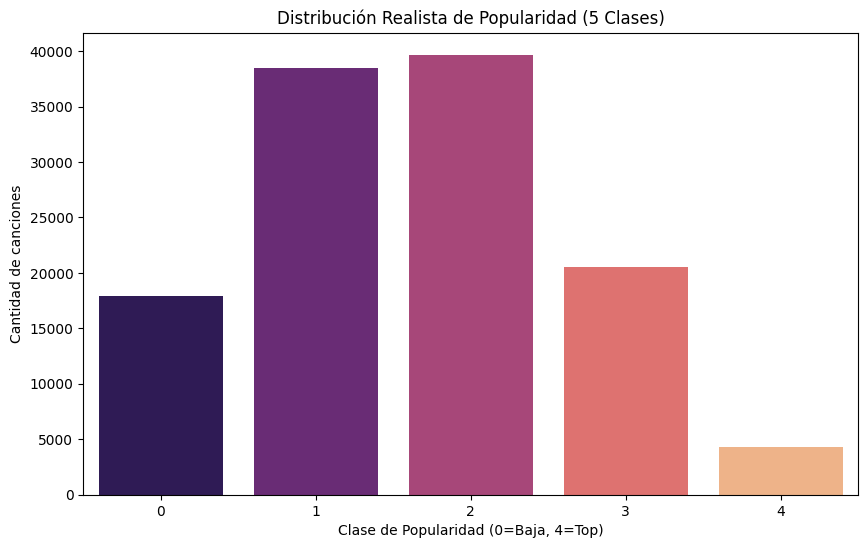

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos los cortes manuales (Lógica de Negocio)
# Los bins definen los límites: 0-25, 25-40, 40-55, 55-70, 70-100
bins_manual = [-1, 25, 40, 55, 70, 100]
labels_manual = [0, 1, 2, 3, 4] 
# 0: Muy Baja, 1: Baja, 2: Media, 3: Alta, 4: SuperHit

# Creamos la variable target definitiva
df_final['popularity_class'] = pd.cut(df_final['popularity'], bins=bins_manual, labels=labels_manual)

# Vemos el recuento
conteo = df_final['popularity_class'].value_counts().sort_index()
print("Distribución de canciones por clase (Realista):")
print(conteo)

# Visualizamos
plt.figure(figsize=(10, 6))
sns.barplot(x=conteo.index, y=conteo.values, palette='magma')
plt.title('Distribución Realista de Popularidad (5 Clases)')
plt.xlabel('Clase de Popularidad (0=Baja, 4=Top)')
plt.ylabel('Cantidad de canciones')
plt.show()